[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tselane2110/Applied-Computer-Vision/blob/main/assignment3/colour_regression.ipynb)


# Colab FAQ

For some basic overview and features offered in Colab notebooks, check out: [Overview of Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

You need to use the colab GPU for this assignmentby selecting:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Helper code
You can ignore the restart warning.

In [1]:
######################################################################
# Setup python environment and change the current working directory
######################################################################
!pip install torch torchvision
!pip install Pillow==4.0.0
%mkdir -p /content/assignment_2
%cd /content/assignment_2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 99.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 14.0 MB/s eta 0:00:00
  Created wheel for Pillow: filename=Pillow-4.0.0-cp312-cp312-linux_x86_64.whl size=934658 sha256=e4ed91c839fcc59ef066fa447e04a70fea4af3561322f7a5d13cc76a978119ac
  Stored in directory: /root/.cache/pip/wheels/2c/3b/e1/18138538bc8c7c6cc3ceb562d32cda68ecbd995b8571508085
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires Pillow>=9.4.0, but you have pillow 4.0.0 which is incompatible.
imageio 2.37.0 requires pillow>=8.3.2, but you have pillow 4.0.0 which is incompat

/content/assignment_2


In [13]:
pip install --upgrade pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.49.1 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.


In [1]:
# adapted from
# https://github.com/fchollet/keras/blob/master/keras/datasets/cifar10.py

import os
from six.moves.urllib.request import urlretrieve
import tarfile
import numpy as np
import pickle
import sys

def get_file(fname,
             origin,
             untar=False,
             extract=False,
             archive_format='auto',
             cache_dir='data'):
    datadir = os.path.join(cache_dir)
    if not os.path.exists(datadir):
        os.makedirs(datadir)

    if untar:
        untar_fpath = os.path.join(datadir, fname)
        fpath = untar_fpath + '.tar.gz'
    else:
        fpath = os.path.join(datadir, fname)

    print(fpath)
    if not os.path.exists(fpath):
        print('Downloading data from', origin)

        error_msg = 'URL fetch failure on {}: {} -- {}'
        try:
            try:
                urlretrieve(origin, fpath)
            except URLError as e:
                raise Exception(error_msg.format(origin, e.errno, e.reason))
            except HTTPError as e:
                raise Exception(error_msg.format(origin, e.code, e.msg))
        except (Exception, KeyboardInterrupt) as e:
            if os.path.exists(fpath):
                os.remove(fpath)
            raise

    if untar:
        if not os.path.exists(untar_fpath):
            print('Extracting file.')
            with tarfile.open(fpath) as archive:
                archive.extractall(datadir)
        return untar_fpath

    if extract:
        _extract_archive(fpath, datadir, archive_format)

    return fpath



def load_batch(fpath, label_key='labels'):
    """Internal utility for parsing CIFAR data.
    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.
    # Returns
        A tuple `(data, labels)`.
    """
    f = open(fpath, 'rb')
    if sys.version_info < (3,):
        d = pickle.load(f)
    else:
        d = pickle.load(f, encoding='bytes')
        # decode utf8
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode('utf8')] = v
        d = d_decoded
    f.close()
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

def load_cifar10(transpose=False):
    """Loads CIFAR10 dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    dirname = 'cifar-10-batches-py'
    origin = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    path = get_file(dirname, origin=origin, untar=True)

    num_train_samples = 50000

    x_train = np.zeros((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        data, labels = load_batch(fpath)
        x_train[(i - 1) * 10000: i * 10000, :, :, :] = data
        y_train[(i - 1) * 10000: i * 10000] = labels

    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if transpose:
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)
    return (x_train, y_train), (x_test, y_test)


## Download files

This may take 1 or 2 mins for the first time.

In [2]:
######################################################################
# Download CIFAR datasets and other related files
######################################################################
colours_fpath = get_file(fname='colours',
                         origin='http://www.cs.toronto.edu/~jba/kmeans_colour_a2.tar.gz',
                         untar=True)
m = load_cifar10()

data/colours.tar.gz
Extracting file.
data/cifar-10-batches-py.tar.gz


/tmp/ipython-input-1316746881.py:48: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  archive.extractall(datadir)


Extracting file.


# Code for training and CNN models

## Data preprocessing

In [3]:
"""
Colourization of CIFAR-10 Horses via classification.
"""
from __future__ import print_function
import argparse
import math
import numpy as np
import numpy.random as npr
import scipy.misc
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt


#from load_data import load_cifar10

HORSE_CATEGORY = 7

######################################################################
# Data related code
######################################################################
def get_rgb_cat(xs, colours):
    """
    Get colour categories given RGB values. This function doesn't
    actually do the work, instead it splits the work into smaller
    chunks that can fit into memory, and calls helper function
    _get_rgb_cat

    Args:
      xs: float numpy array of RGB images in [B, C, H, W] format
      colours: numpy array of colour categories and their RGB values
    Returns:
      result: int numpy array of shape [B, 1, H, W]
    """
    if np.shape(xs)[0] < 100:
        return _get_rgb_cat(xs)
    batch_size = 100
    nexts = []
    for i in range(0, np.shape(xs)[0], batch_size):
        next = _get_rgb_cat(xs[i:i+batch_size,:,:,:], colours)
        nexts.append(next)
    result = np.concatenate(nexts, axis=0)
    return result

def _get_rgb_cat(xs, colours):
    """
    Get colour categories given RGB values. This is done by choosing
    the colour in `colours` that is the closest (in RGB space) to
    each point in the image `xs`. This function is a little memory
    intensive, and so the size of `xs` should not be too large.

    Args:
      xs: float numpy array of RGB images in [B, C, H, W] format
      colours: numpy array of colour categories and their RGB values
    Returns:
      result: int numpy array of shape [B, 1, H, W]
    """
    num_colours = np.shape(colours)[0]
    xs = np.expand_dims(xs, 0)
    cs = np.reshape(colours, [num_colours,1,3,1,1])
    dists = np.linalg.norm(xs-cs, axis=2) # 2 = colour axis
    cat = np.argmin(dists, axis=0)
    cat = np.expand_dims(cat, axis=1)
    return cat

def get_cat_rgb(cats, colours):
    """
    Get RGB colours given the colour categories

    Args:
      cats: integer numpy array of colour categories
      colours: numpy array of colour categories and their RGB values
    Returns:
      numpy tensor of RGB colours
    """
    return colours[cats]

def process(xs, ys, max_pixel=256.0, downsize_input=False):
    """
    Pre-process CIFAR10 images by taking only the horse category,
    shuffling, and have colour values be bound between 0 and 1

    Args:
      xs: the colour RGB pixel values
      ys: the category labels
      max_pixel: maximum pixel value in the original data
    Returns:
      xs: value normalized and shuffled colour images
      grey: greyscale images, also normalized so values are between 0 and 1
    """
    xs = xs / max_pixel
    xs = xs[np.where(ys == HORSE_CATEGORY)[0], :, :, :]
    npr.shuffle(xs)
    grey = np.mean(xs, axis=1, keepdims=True)
    if downsize_input:
      avg_pool = nn.Sequential(nn.AvgPool2d(2),nn.AvgPool2d(2),
                               nn.Upsample(scale_factor=2, mode='bilinear'), nn.Upsample(scale_factor=2, mode='bilinear'))
      grey_downsized = avg_pool.forward(torch.from_numpy(grey).float())
      grey = grey_downsized.data.numpy()
    return (xs, grey)


def get_batch(x, y, batch_size):
    '''
    Generated that yields batches of data

    Args:
      x: input values
      y: output values
      batch_size: size of each batch
    Yields:
      batch_x: a batch of inputs of size at most batch_size
      batch_y: a batch of outputs of size at most batch_size
    '''
    N = np.shape(x)[0]
    assert N == np.shape(y)[0]
    for i in range(0, N, batch_size):
        batch_x = x[i:i+batch_size, :,:,:]
        batch_y = y[i:i+batch_size, :,:,:]
        yield (batch_x, batch_y)

######################################################################
# Torch Helper
######################################################################

def get_torch_vars(xs, ys, gpu=False):
    """
    Helper function to convert numpy arrays to pytorch tensors.
    If GPU is used, move the tensors to GPU.

    Args:
      xs (float numpy tenosor): greyscale input
      ys (int numpy tenosor): categorical labels
      gpu (bool): whether to move pytorch tensor to GPU
    Returns:
      Variable(xs), Variable(ys)
    """
    xs = torch.from_numpy(xs).float()
    ys = torch.from_numpy(ys).float()
    if gpu:
        xs = xs.cuda()
        ys = ys.cuda()
    return Variable(xs), Variable(ys)

def compute_loss(criterion, outputs, labels, batch_size, num_colours):
    """
    Helper function to compute the loss. Since this is a pixelwise
    prediction task we need to reshape the output and ground truth
    tensors into a 2D tensor before passing it in to the loss criteron.

    Args:
      criterion: pytorch loss criterion
      outputs (pytorch tensor): predicted labels from the model
      labels (pytorch tensor): ground truth labels
      batch_size (int): batch size used for training
      num_colours (int): number of colour categories
    Returns:
      pytorch tensor for loss
    """

    loss_out = outputs.transpose(1,3) \
                      .contiguous() \
                      .view([batch_size*32*32, num_colours])
    loss_lab = labels.transpose(1,3) \
                      .contiguous() \
                      .view([batch_size*32*32])
    return criterion(loss_out, loss_lab)

def run_validation_step(cnn, criterion, test_grey, test_rgb_cat, batch_size,
                        colours, plotpath=None, visualize=True):
    correct = 0.0
    total = 0.0
    losses = []
    num_colours = np.shape(colours)[0]
    for i, (xs, ys) in enumerate(get_batch(test_grey,
                                           test_rgb_cat,
                                           batch_size)):
        images, labels = get_torch_vars(xs, ys, args.gpu)
        outputs = cnn(images)

        val_loss = compute_loss(criterion,
                                outputs,
                                labels,
                                batch_size=args.batch_size,
                                num_colours=num_colours)
        losses.append(val_loss.data.item())

        _, predicted = torch.max(outputs.data, 1, keepdim=True)
        total += labels.size(0) * 32 * 32
        correct += (predicted == labels.data).sum()

    if plotpath: # only plot if a path is provided
        plot(xs, ys, predicted.cpu().numpy(), colours,
             plotpath, visualize=visualize)

    val_loss = np.mean(losses)
    val_acc = 100 * correct / total
    return val_loss, val_acc


/tmp/ipython-input-1959818569.py:9: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc


## Visualization

In [4]:
def plot(input, gtlabel, output, colours, path, visualize):
    """
    Generate png plots of input, ground truth, and outputs

    Args:
      input: the greyscale input to the colourization CNN
      gtlabel: the grouth truth categories for each pixel
      output: the predicted categories for each pixel
      colours: numpy array of colour categories and their RGB values
      path: output path
    """
    k = 10
    grey = np.transpose(input[:k,:,:,:], [0,2,3,1])
    if colours is None:
      gtcolor = np.transpose(gtlabel[:k,:,:,:], [0,2,3,1])
      predcolor = np.transpose(output[:k,:,:,:], [0,2,3,1])
    else:
      gtcolor = get_cat_rgb(gtlabel[:k,0,:,:], colours)
      predcolor = get_cat_rgb(output[:k,0,:,:], colours)

    img = np.vstack([
      np.hstack(np.tile(grey, [1,1,1,3])),
      np.hstack(gtcolor),
      np.hstack(predcolor)])
    #plt.figure()
    plt.grid('off')
    plt.imshow(img, vmin=0., vmax=1.)
    if visualize:
      plt.show()
    else:
      plt.savefig(path)

## Training

In [5]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

def train(args, cnn=None):
    # Set the maximum number of threads to prevent crash in Teaching Labs
    torch.set_num_threads(5)
    # Numpy random seed
    npr.seed(args.seed)

    # Save directory
    save_dir = "outputs/" + args.experiment_name

    # LOAD THE MODEL
    if cnn is None:
      cnn = RegressionCNN(args.kernel, args.num_filters)

    # Set up L2 loss
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(cnn.parameters(), lr=args.learn_rate)


    # Loading & transforming data
    print("Loading data...")
    (x_train, y_train), (x_test, y_test) = load_cifar10()
    train_rgb, train_grey = process(x_train, y_train)
    test_rgb, test_grey = process(x_test, y_test)


    # Create the outputs folder if not created already
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    print("Beginning training ...")
    if args.gpu: cnn.cuda()
    start = time.time()


    for epoch in range(args.epochs):
        # Train the Model
        cnn.train() # Change model to 'train' mode
        for i, (xs, ys) in enumerate(get_batch(train_grey,
                                               train_rgb,
                                               args.batch_size)):
            images, labels = get_torch_vars(xs, ys, args.gpu)
            # Forward + Backward + Optimize
            optimizer.zero_grad()
            outputs = cnn(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, args.epochs, loss.data.item()))

        # Evaluate the model
        cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
        losses = []
        for i, (xs, ys) in enumerate(get_batch(test_grey,
                                               test_rgb,
                                               args.batch_size)):
            images, labels = get_torch_vars(xs, ys, args.gpu)
            outputs = cnn(images)

            val_loss = criterion(outputs, labels)
            losses.append(val_loss.data.item())

        val_loss = np.mean(losses)
        print('Epoch [%d/%d], Val Loss: %.4f' % (epoch+1, args.epochs, val_loss))



    print("Generating predictions...")
    plot(xs, ys, outputs.cpu().data, colours=None,
             path=save_dir+"/regression_output.png", visualize=args.visualize)
#     grey = test_grey[:15]
#     gtrgb = test_rgb[:15]
#     grey, gtrgb = get_torch_vars(test_grey[:15], test_rgb[:15], args.gpu)
#     predrgb = cnn(grey)
#     plot(grey.cpu().data, gtrgb.cpu().data, predrgb.cpu().data, colours=None,
#          path=save_dir+"/regression_output.png", visualize=args.visualize)

    if args.checkpoint:
        print('Saving model...')
        torch.save(cnn.state_dict(), args.checkpoint)

    return cnn

## Regression network

In [6]:
class MyConv2d(nn.Module):
    """
    Our simplified implemented of nn.Conv2d module for 2D convolution
    """
    def __init__(self, in_channels, out_channels, kernel_size, padding=None):
        super(MyConv2d, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        if padding is None:
            self.padding = kernel_size // 2
        else:
            self.padding = padding
        self.weight = nn.parameter.Parameter(torch.Tensor(
            out_channels, in_channels, kernel_size, kernel_size))
        self.bias = nn.parameter.Parameter(torch.Tensor(out_channels))
        self.reset_parameters()

    def reset_parameters(self):
        n = self.in_channels * self.kernel_size * self.kernel_size
        stdv = 1. / math.sqrt(n)
        self.weight.data.uniform_(-stdv, stdv)
        self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input):
        return F.conv2d(input, self.weight, self.bias, padding=self.padding)


class RegressionCNN(nn.Module):
    def __init__(self, kernel, num_filters):
        # first call parent's initialization function
        super(RegressionCNN, self).__init__()
        padding = kernel // 2

        self.downconv1 = nn.Sequential(
            nn.Conv2d(1, num_filters, kernel_size=kernel, padding=padding),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            nn.MaxPool2d(2),)
        self.downconv2 = nn.Sequential(
            nn.Conv2d(num_filters, num_filters*2, kernel_size=kernel, padding=padding),
            nn.BatchNorm2d(num_filters*2),
            nn.ReLU(),
            nn.MaxPool2d(2),)

        self.rfconv = nn.Sequential(
            nn.Conv2d(num_filters*2, num_filters*2, kernel_size=kernel, padding=padding),
            nn.BatchNorm2d(num_filters*2),
            nn.ReLU())

        self.upconv1 = nn.Sequential(
            nn.Conv2d(num_filters*2, num_filters, kernel_size=kernel, padding=padding),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),)
        self.upconv2 = nn.Sequential(
            nn.Conv2d(num_filters, 3, kernel_size=kernel, padding=padding),
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),)
        self.finalconv = MyConv2d(3, 3, kernel_size=kernel)

    def forward(self, x):
        out = self.downconv1(x)
        out = self.downconv2(out)
        out = self.rfconv(out)
        out = self.upconv1(out)
        out = self.upconv2(out)
        out = self.finalconv(out)
        return out

# CIFAR-10 colour regression

## Main training loop for regression CNN

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/25], Loss: 0.0497
Epoch [1/25], Val Loss: 0.0444
Epoch [2/25], Loss: 0.0219
Epoch [2/25], Val Loss: 0.0210
Epoch [3/25], Loss: 0.0168
Epoch [3/25], Val Loss: 0.0173
Epoch [4/25], Loss: 0.0151
Epoch [4/25], Val Loss: 0.0153
Epoch [5/25], Loss: 0.0141
Epoch [5/25], Val Loss: 0.0145
Epoch [6/25], Loss: 0.0134
Epoch [6/25], Val Loss: 0.0136
Epoch [7/25], Loss: 0.0129
Epoch [7/25], Val Loss: 0.0129
Epoch [8/25], Loss: 0.0124
Epoch [8/25], Val Loss: 0.0124
Epoch [9/25], Loss: 0.0120
Epoch [9/25], Val Loss: 0.0119
Epoch [10/25], Loss: 0.0117
Epoch [10/25], Val Loss: 0.0115
Epoch [11/25], Loss: 0.0114
Epoch [11/25], Val Loss: 0.0111
Epoch [12/25], Loss: 0.0112
Epoch [12/25], Val Loss: 0.0107
Epoch [13/25], Loss: 0.0109
Epoch [13/25], Val Loss: 0.0104
Epoch [14/25], Loss: 0.0107
Epoch [14/25], Val Loss: 0.0102
Epoch [15/25], Loss: 0.0104
Epoch [15/25], Val Loss: 0.0100
Epoch [16/25], Loss: 0.0102
Epoch [16/25], Val 

Epoch [25/25], Loss: 0.0089
Epoch [25/25], Val Loss: 0.0086
Generating predictions...


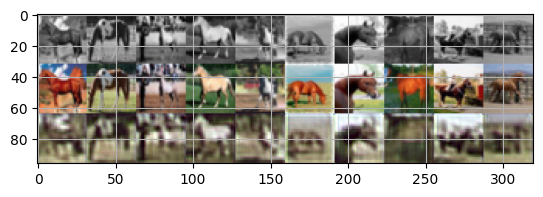

In [7]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':25,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

## For epochs = 15

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/15], Loss: 0.0315
Epoch [1/15], Val Loss: 0.0291
Epoch [2/15], Loss: 0.0207
Epoch [2/15], Val Loss: 0.0198
Epoch [3/15], Loss: 0.0172
Epoch [3/15], Val Loss: 0.0166
Epoch [4/15], Loss: 0.0153
Epoch [4/15], Val Loss: 0.0150
Epoch [5/15], Loss: 0.0140
Epoch [5/15], Val Loss: 0.0139
Epoch [6/15], Loss: 0.0131
Epoch [6/15], Val Loss: 0.0129
Epoch [7/15], Loss: 0.0123
Epoch [7/15], Val Loss: 0.0122
Epoch [8/15], Loss: 0.0117
Epoch [8/15], Val Loss: 0.0117
Epoch [9/15], Loss: 0.0112
Epoch [9/15], Val Loss: 0.0114
Epoch [10/15], Loss: 0.0109
Epoch [10/15], Val Loss: 0.0110
Epoch [11/15], Loss: 0.0105
Epoch [11/15], Val Loss: 0.0106
Epoch [12/15], Loss: 0.0103
Epoch [12/15], Val Loss: 0.0103
Epoch [13/15], Loss: 0.0100
Epoch [13/15], Val Loss: 0.0101
Epoch [14/15], Loss: 0.0098
Epoch [14/15], Val Loss: 0.0099


Epoch [15/15], Loss: 0.0096
Epoch [15/15], Val Loss: 0.0097
Generating predictions...


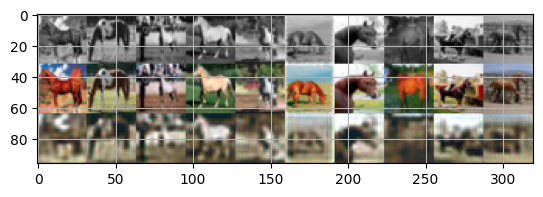

In [8]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':15,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

## For epochs = 20

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/20], Loss: 0.0657
Epoch [1/20], Val Loss: 0.0707
Epoch [2/20], Loss: 0.0297
Epoch [2/20], Val Loss: 0.0308
Epoch [3/20], Loss: 0.0210
Epoch [3/20], Val Loss: 0.0207
Epoch [4/20], Loss: 0.0179
Epoch [4/20], Val Loss: 0.0175
Epoch [5/20], Loss: 0.0163
Epoch [5/20], Val Loss: 0.0159
Epoch [6/20], Loss: 0.0152
Epoch [6/20], Val Loss: 0.0149
Epoch [7/20], Loss: 0.0143
Epoch [7/20], Val Loss: 0.0142
Epoch [8/20], Loss: 0.0136
Epoch [8/20], Val Loss: 0.0136
Epoch [9/20], Loss: 0.0129
Epoch [9/20], Val Loss: 0.0129
Epoch [10/20], Loss: 0.0123
Epoch [10/20], Val Loss: 0.0123
Epoch [11/20], Loss: 0.0119
Epoch [11/20], Val Loss: 0.0119
Epoch [12/20], Loss: 0.0115
Epoch [12/20], Val Loss: 0.0114
Epoch [13/20], Loss: 0.0112
Epoch [13/20], Val Loss: 0.0111
Epoch [14/20], Loss: 0.0109
Epoch [14/20], Val Loss: 0.0108
Epoch [15/20], Loss: 0.0107
Epoch [15/20], Val Loss: 0.0106
Epoch [16/20], Loss: 0.0105
Epoch [16/20], Val 

Epoch [20/20], Loss: 0.0098
Epoch [20/20], Val Loss: 0.0096
Generating predictions...


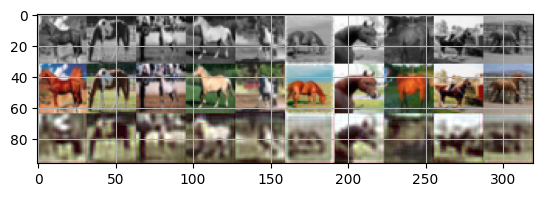

In [9]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':20,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

## For epochs = 50

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/50], Loss: 0.1511
Epoch [1/50], Val Loss: 0.1541
Epoch [2/50], Loss: 0.0426
Epoch [2/50], Val Loss: 0.0469
Epoch [3/50], Loss: 0.0234
Epoch [3/50], Val Loss: 0.0232
Epoch [4/50], Loss: 0.0189
Epoch [4/50], Val Loss: 0.0187
Epoch [5/50], Loss: 0.0172
Epoch [5/50], Val Loss: 0.0170
Epoch [6/50], Loss: 0.0161
Epoch [6/50], Val Loss: 0.0160
Epoch [7/50], Loss: 0.0152
Epoch [7/50], Val Loss: 0.0151
Epoch [8/50], Loss: 0.0144
Epoch [8/50], Val Loss: 0.0144
Epoch [9/50], Loss: 0.0138
Epoch [9/50], Val Loss: 0.0138
Epoch [10/50], Loss: 0.0133
Epoch [10/50], Val Loss: 0.0133
Epoch [11/50], Loss: 0.0128
Epoch [11/50], Val Loss: 0.0128
Epoch [12/50], Loss: 0.0124
Epoch [12/50], Val Loss: 0.0124
Epoch [13/50], Loss: 0.0121
Epoch [13/50], Val Loss: 0.0121
Epoch [14/50], Loss: 0.0117
Epoch [14/50], Val Loss: 0.0120
Epoch [15/50], Loss: 0.0115
Epoch [15/50], Val Loss: 0.0116
Epoch [16/50], Loss: 0.0112
Epoch [16/50], Val 

Epoch [50/50], Loss: 0.0076
Epoch [50/50], Val Loss: 0.0075
Generating predictions...


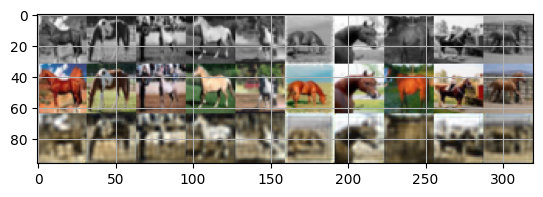

In [10]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':50,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

## For epochs = 75

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/75], Loss: 0.0934
Epoch [1/75], Val Loss: 0.0836
Epoch [2/75], Loss: 0.0356
Epoch [2/75], Val Loss: 0.0340
Epoch [3/75], Loss: 0.0226
Epoch [3/75], Val Loss: 0.0217
Epoch [4/75], Loss: 0.0184
Epoch [4/75], Val Loss: 0.0177
Epoch [5/75], Loss: 0.0163
Epoch [5/75], Val Loss: 0.0159
Epoch [6/75], Loss: 0.0149
Epoch [6/75], Val Loss: 0.0149
Epoch [7/75], Loss: 0.0139
Epoch [7/75], Val Loss: 0.0139
Epoch [8/75], Loss: 0.0131
Epoch [8/75], Val Loss: 0.0131
Epoch [9/75], Loss: 0.0125
Epoch [9/75], Val Loss: 0.0125
Epoch [10/75], Loss: 0.0121
Epoch [10/75], Val Loss: 0.0120
Epoch [11/75], Loss: 0.0117
Epoch [11/75], Val Loss: 0.0116
Epoch [12/75], Loss: 0.0114
Epoch [12/75], Val Loss: 0.0113
Epoch [13/75], Loss: 0.0111
Epoch [13/75], Val Loss: 0.0110
Epoch [14/75], Loss: 0.0109
Epoch [14/75], Val Loss: 0.0108
Epoch [15/75], Loss: 0.0107
Epoch [15/75], Val Loss: 0.0106
Epoch [16/75], Loss: 0.0105
Epoch [16/75], Val 

Epoch [75/75], Loss: 0.0067
Epoch [75/75], Val Loss: 0.0070
Generating predictions...


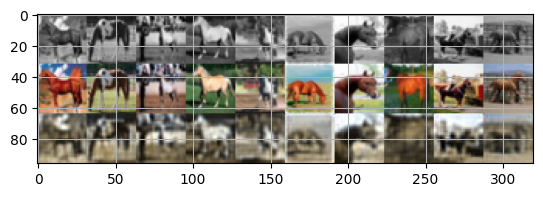

In [11]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':75,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

## For epochs = 100

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/100], Loss: 0.0419
Epoch [1/100], Val Loss: 0.0428
Epoch [2/100], Loss: 0.0202
Epoch [2/100], Val Loss: 0.0202
Epoch [3/100], Loss: 0.0164
Epoch [3/100], Val Loss: 0.0164
Epoch [4/100], Loss: 0.0146
Epoch [4/100], Val Loss: 0.0144
Epoch [5/100], Loss: 0.0134
Epoch [5/100], Val Loss: 0.0132
Epoch [6/100], Loss: 0.0124
Epoch [6/100], Val Loss: 0.0122
Epoch [7/100], Loss: 0.0118
Epoch [7/100], Val Loss: 0.0115
Epoch [8/100], Loss: 0.0112
Epoch [8/100], Val Loss: 0.0110
Epoch [9/100], Loss: 0.0108
Epoch [9/100], Val Loss: 0.0106
Epoch [10/100], Loss: 0.0105
Epoch [10/100], Val Loss: 0.0103
Epoch [11/100], Loss: 0.0102
Epoch [11/100], Val Loss: 0.0100
Epoch [12/100], Loss: 0.0100
Epoch [12/100], Val Loss: 0.0097
Epoch [13/100], Loss: 0.0098
Epoch [13/100], Val Loss: 0.0095
Epoch [14/100], Loss: 0.0096
Epoch [14/100], Val Loss: 0.0093
Epoch [15/100], Loss: 0.0095
Epoch [15/100], Val Loss: 0.0092
Epoch [16/100], L

Epoch [100/100], Loss: 0.0060
Epoch [100/100], Val Loss: 0.0060
Generating predictions...


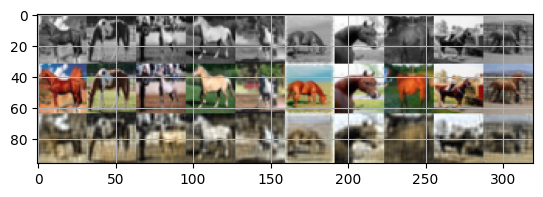

In [13]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':100,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/500], Loss: 0.0181
Epoch [1/500], Val Loss: 0.0192
Epoch [2/500], Loss: 0.0149
Epoch [2/500], Val Loss: 0.0152
Epoch [3/500], Loss: 0.0133
Epoch [3/500], Val Loss: 0.0135
Epoch [4/500], Loss: 0.0122
Epoch [4/500], Val Loss: 0.0123
Epoch [5/500], Loss: 0.0115
Epoch [5/500], Val Loss: 0.0114
Epoch [6/500], Loss: 0.0109
Epoch [6/500], Val Loss: 0.0108
Epoch [7/500], Loss: 0.0105
Epoch [7/500], Val Loss: 0.0104
Epoch [8/500], Loss: 0.0102
Epoch [8/500], Val Loss: 0.0100
Epoch [9/500], Loss: 0.0099
Epoch [9/500], Val Loss: 0.0098
Epoch [10/500], Loss: 0.0097
Epoch [10/500], Val Loss: 0.0095
Epoch [11/500], Loss: 0.0095
Epoch [11/500], Val Loss: 0.0093
Epoch [12/500], Loss: 0.0093
Epoch [12/500], Val Loss: 0.0091
Epoch [13/500], Loss: 0.0092
Epoch [13/500], Val Loss: 0.0090
Epoch [14/500], Loss: 0.0091
Epoch [14/500], Val Loss: 0.0088
Epoch [15/500], Loss: 0.0089
Epoch [15/500], Val Loss: 0.0087
Epoch [16/500], L

Epoch [500/500], Loss: 0.0043
Epoch [500/500], Val Loss: 0.0066
Generating predictions...


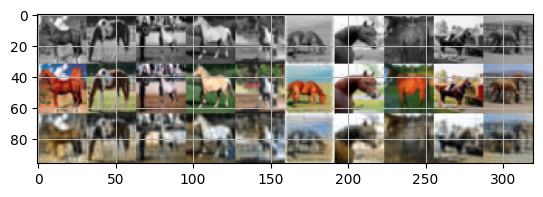

In [13]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':500,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)

Loading data...
data/cifar-10-batches-py.tar.gz
Beginning training ...
Epoch [1/1000], Loss: 0.1353
Epoch [1/1000], Val Loss: 0.1330
Epoch [2/1000], Loss: 0.0345
Epoch [2/1000], Val Loss: 0.0331
Epoch [3/1000], Loss: 0.0201
Epoch [3/1000], Val Loss: 0.0202
Epoch [4/1000], Loss: 0.0173
Epoch [4/1000], Val Loss: 0.0174
Epoch [5/1000], Loss: 0.0158
Epoch [5/1000], Val Loss: 0.0158
Epoch [6/1000], Loss: 0.0146
Epoch [6/1000], Val Loss: 0.0146
Epoch [7/1000], Loss: 0.0137
Epoch [7/1000], Val Loss: 0.0137
Epoch [8/1000], Loss: 0.0130
Epoch [8/1000], Val Loss: 0.0130
Epoch [9/1000], Loss: 0.0124
Epoch [9/1000], Val Loss: 0.0124
Epoch [10/1000], Loss: 0.0120
Epoch [10/1000], Val Loss: 0.0120
Epoch [11/1000], Loss: 0.0115
Epoch [11/1000], Val Loss: 0.0115
Epoch [12/1000], Loss: 0.0110
Epoch [12/1000], Val Loss: 0.0110
Epoch [13/1000], Loss: 0.0107
Epoch [13/1000], Val Loss: 0.0105
Epoch [14/1000], Loss: 0.0104
Epoch [14/1000], Val Loss: 0.0102
Epoch [15/1000], Loss: 0.0101
Epoch [15/1000], Val 

Epoch [1000/1000], Loss: 0.0040
Epoch [1000/1000], Val Loss: 0.0067
Generating predictions...


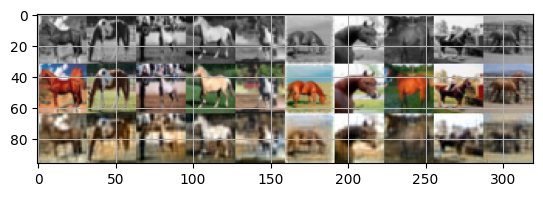

In [14]:
args = AttrDict()
args_dict = {
              'gpu':True,
              'valid':False,
              'checkpoint':"",
              'kernel':3,
              'num_filters':32,
              'learn_rate':0.001,
              'batch_size':100,
              'epochs':1000,
              'seed':0,
              'plot':True,
              'experiment_name': 'regression_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
cnn = train(args)